## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# Setting the seed to assure you get the same results for test purposes
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  
a. Read in the dataset and take a look at the top few rows here:

In [7]:
#read dataset and take a peak
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [8]:
#number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [9]:
#finding number of unique users
uniq_users = df['user_id'].nunique()
uniq_users

290584

d. The proportion of users converted.

In [10]:
#finding proportion of converted users
uniq_converted = df.query('converted == 1').user_id.nunique()
convertion_rate = round(uniq_converted/ uniq_users, 2)
convertion_rate

0.12

e. The number of times the `new_page` and `treatment` don't match.

In [11]:
#finding number of times when 'new_page' and 'treatment' did not match
treatment = df.query('group == "treatment" and landing_page != "new_page"')
control = df.query('group == "control" and landing_page != "old_page"')
treatment.shape[0] + control.shape[0]

3893

f. Do any of the rows have missing values?

In [12]:
# finding missing values
df.isnull().sum()
# there are not missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  
a. Now,create a new dataset and store your new dataframe in **df2**.

In [13]:
# creating a new dataset from a subset of original dataset
df2 = df.query('(group == "treatment" and landing_page == "new_page") or  (group == "control" and landing_page == "old_page")')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [15]:
# checking number of rows in the new dataset
df2.shape[0]

290585

`3.` Use **df2** and the cells below to answer questions.

a. How many unique **user_id**s are in **df2**?

In [16]:
# finding number of unique users in the new dataset
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
# finding the duplicated user_id
duplicate_id = df2[df2.duplicated(['user_id'], keep=False)].user_id.unique()[0]
duplicate_id

773192

c. What is the row information for the repeat **user_id**? 

In [18]:
# finding the row information for the duplicated user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [19]:
#finding the index of the duplicated user_id - it will return the first row value in the order
duplicate_index = df2.user_id.eq(duplicate_id).idxmax()
duplicate_index

1899

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
#dropping one of the duplicated values
df2 = df2.drop(duplicate_index)
df2.user_id.nunique()

290584

`4.` Use **df2** in the cells below to answer questions.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# finding convertion rate regardles of the type of page shown
uniq_users = df2['user_id'].nunique()
uniq_converted = df2.query('converted == 1').user_id.nunique()
converting_regardless = round(uniq_converted/ uniq_users, 2)
converting_regardless

0.12

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
# finding convertion rate for the control group
control = df2.query('group == "control"')
total_control = control['user_id'].nunique()
converted_control = control.query('converted == 1')['user_id'].nunique()
converting_control = round(converted_control/total_control, 2)
converting_control

0.12

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
# finding convertion for the treatment group
treatment = df2.query('group == "treatment"')
total_treatment = treatment['user_id'].nunique()
converted_treatment = treatment.query('converted == 1')['user_id'].nunique()
converting_treatment = converted_treatment/total_treatment
round(converting_treatment, 2)

0.12

d. What is the probability that an individual received the new page?

In [24]:
# finding probability that one receives the new page
total = df2.shape[0]
new_page = df2.query('landing_page == "new_page"').shape[0]
round(new_page / total, 2)

0.5

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

*Chance of an invidual receiving a new page is 50%. The observed probability of converting regarless of receiving a new page or an old page is 12%. The observed probability of control group converting is 12%. The observed probability of treatment group converting is 12%.The observed probability of the treatment group is equal to both control group and regardless probability.There is no sufficient evidence to conclude that the new treatment page leads to more converstion. However, we want to foolprove our conclusion by bootstrapping below.*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

*This would be one-tailed test, and my hypothesis would be as below:*

H_null:  $p_{old}$ >=  $p_{new}$

H_alt:   $p_{old}$ <  $p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation. <br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
# finding convertion rate for p_new under the null
p_new = df2['converted'].mean()
p_new = round(p_new, 2)
p_new

0.12

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
# finding convertion rate for p_old under the null
p_old =  df2['converted'].mean()
p_old = round(p_old, 2)
p_old

0.12

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
# finding number of participatns in treatment group
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
# finding number of participatns in control group
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
# stimulationg n_new transaction with p_new
new_page_converted = np.random.choice(2, size=n_new, p=[p_new, 1-p_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
# stimulationg n_old transaction with p_old
old_page_converted = np.random.choice(2, size=n_old, p=[p_old, 1-p_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
# finding the observed difference
obs_diff_for_sample = round(new_page_converted.mean() - old_page_converted.mean(),2)
obs_diff_for_sample

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
# Creating a sampling distribution of the difference in proportions with bootstrapping
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs

array([ 0.00094773, -0.00011946,  0.0004795 , ..., -0.00249358,
       -0.00051838, -0.00153678])

In [33]:
# Converting the p_diffs array to a numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

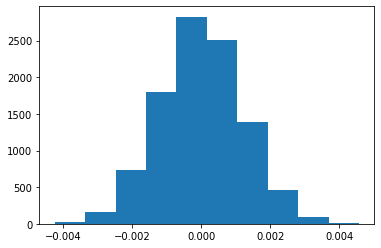

In [34]:
# Plotting the sampling distribution 
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

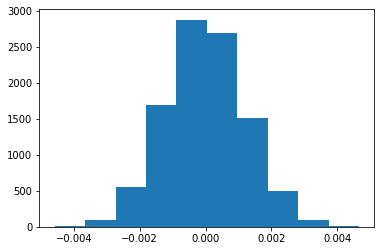

In [35]:
# Simulate distribution under the null hypothesis with normal distirbution
null_vals = np.random.normal(0,p_diffs.std(), p_diffs.size )

# Plot the null distribution
plt.hist(null_vals);

In [36]:
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()
obs_diff

-0.0015782389853555567

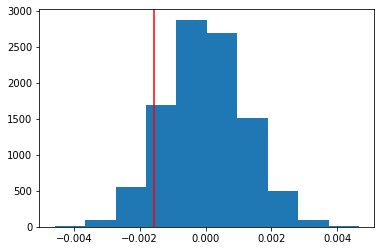

In [37]:
# Plotting the observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [38]:
# Computing the p-value
p_val = (null_vals > obs_diff).mean()
p_val

0.9048

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

*We have computed p-value in j, and it is 0.90, which is greater than Type I error rate: 0.90 > 0.05. Based on the p_value, we have evidence, with a type I error rate of 0.05, to fail to reject the null hypothesis. That means that there was no difference in treatment and control groups.*


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted==1').shape[0]
convert_new = df2.query('group == "treatment" and converted==1').shape[0]
n_old =  df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

In [40]:
# finding number of converted users in the control group
df2.query('group == "control" and converted==1').shape[0]

17489

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [41]:
# finding Z-score and p_values
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_test , p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

*P-value is greater than 0.05 critical point: 0.90 > 0.05. Z-score is between -1.96 and +1.96.Therefore, we fail to reject the null hypothsis. The pattern exhibited is a pattern that could very likely be one version of a random pattern.Results agree with parts j and k.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

*I chose to run a logictic regression model because we want to know the answer in two outcomes: yes or no for the question posed in hypothesis.*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
# current state of our dataset
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [43]:
#adding an intercept and a dummy columns
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [44]:
# dropping 'old_page' column since we won't need it anymore
df2 = df2.drop('old_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [45]:
# dropping 'landing_page' column since we won't need it anymore
df2 = df2.drop('landing_page', axis=1)
df2.head()

,user_id,timestamp,group,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [46]:
# initiating and fitting the regression model to see if ab_page has any effect on convertion rate
logic_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logic_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
# providing model summaries
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-08-11 06:44 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

*P-value in my logical regression model is 0.1899. P-value is greater than error rate of 0.05.  My hypothesis test in my regression model is:*

H_null: Beta = 0 

H_alt: Beta != 0

*Beta being a rate of Type II error.
This hypothesis is a two-tail hypothesis, where we are looking for any difference, weather increase or deacrease. 
In Part II, my hypothesis was one-tailed, where I was looking for any decrease in conversion.* 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

*It is a good idea to consider other variables to make sure that there are no other dependent variables that could impact in identifying the main effect of page converstion.  
Cons of considering other variables is that we will have to face with the curse of dimentionality. Adding more variables to the regression model will reduce the degrees of freedom to identify significant effects. Colliniar factors sometimes give unpredictable results.*


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
# reading countries csv
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [50]:
# merging two datasets based on the user_id column
df3 =pd.merge(df2, countries,on=['user_id'], how='inner')
df3.head()

,user_id,timestamp,group,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,1,1,0,US


In [51]:
# checking the number of users in different countries
df3.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [52]:
# creating dummies for country
countries = pd.get_dummies(df3['country'])
countries.head()

,CA,UK,US
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [53]:
# adding dummies to the main dataset
df3[['CA', 'UK', 'US']] = countries
df3.head()

,user_id,timestamp,group,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,1,1,0,US,0,0,1


In [54]:
#running a model with countries to see effect of countries on converstion - we would use one less than the number of countries
logic_mod1 = sm.Logit(df3['converted'], df3[['intercept', 'US', 'UK']])
results1= logic_mod1.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [55]:
# providing summaries
results1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-08-11 06:45 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

**Response**

*Both countries' p_values are greater than 0.05, therefore statistically insignificant. There seems to be no effect of users' country in the converstion rate.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
# adding additonal columns to look at an interaction between page and country to see effects
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3.head()

,user_id,timestamp,group,converted,intercept,ab_page,country,CA,UK,US,US_ab_page,UK_ab_page
0,851104,2017-01-21 22:11:48.556739,control,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,1,US,0,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,1,US,0,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,1,1,0,US,0,0,1,0,0


In [57]:
# running a model to see effect of both ab_page and countries
logic_mod2 = sm.Logit(df3['converted'], df3[['intercept', 'US_ab_page', 'UK_ab_page']])
results2= logic_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [58]:
# providing summaries
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.7674
Date:               2020-08-11 06:45 BIC:              212813.5064
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.31643    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
US_ab_page   -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
UK_ab_page    0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
==================================================================

"""

**Response**

*US_ab_page p_value is 0.2482 and UK_ab_page p_value is 0.5316. Both of them are greater than  error rate 0.05. This shows that intercation between country and new page conversion does not  have any difference in the page converstion. This proves that our models in Part II were correct. Therefore, we continue to fail to reject the null hypothesis. That means that the treatment and control group converstion rate is the same, and treatment has no effect on the page convertion.

All p_values in the above scenarious are above the error rate of 0.05, therefore, all of them are statistically insignificant. They are practically significant, especially when the old page convertion rate is slighly better (0.12) than a new page (0.117)convertion rate. Therefore, the company should keep the old page.*

<a id='conclusions'></a>

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295